# Examples Using Historical Statistics of the US Data

In [1]:
import matplotlib.dates as dts
import fredpy as fp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

## Preliminaries

In [2]:
# 0.1 general plot settings

# font = {'weight' : 'bold',
#         'size'   : 15}
# plt.rc('font', **font)
# plt.rcParams['xtick.major.pad']='8'
# plt.rcParams['ytick.major.pad']='8'


# 0.2 Formatter for inserting commas in y axis labels with magnitudes in the thousands

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s

y_format = plt.FuncFormatter(func)  # make formatter

# 0.3 format the x axis ticksticks
years2,years4,years5,years10,years15,years20= dts.YearLocator(2),dts.YearLocator(4),dts.YearLocator(5),dts.YearLocator(10),dts.YearLocator(15),dts.YearLocator(20)


# 0.4 y label locator for vertical axes plotting gdp
majorLocator_y   = plt.MultipleLocator(3)
majorLocator_shares   = plt.MultipleLocator(0.2)

## Plot Select US Macroeconomic Time Series

In [3]:
# GNP and GNP deflator data
names = ['GNP - current prices [bil. of dollars]',
         'GNP per capita [current prices - dollars]',
         'GNP - 1958 prices [bil. of dollars]',
         'GNP per capita [1958 prices - dollars]',
         'GNP deflator [1958 = 100]'
         ]

gnp_data = pd.read_csv('../csv/Historical Statistics of the US - gross national product.csv', names= names, skiprows=8,parse_dates=True)

gnp_pc = fp.to_fred_series(data = gnp_data['GNP per capita [1958 prices - dollars]'],dates=gnp_data.index)
gnp_def = fp.to_fred_series(data = gnp_data['GNP deflator [1958 = 100]'],dates=gnp_data.index)


In [4]:
# Unemployment data
names = ['unemployed [thousands]',
         'unemployment rate [percent]'
]

unemployment = pd.read_csv('../csv/Historical Statistics of the US - unemployment.csv', names= names, skiprows  =5,parse_dates=True)
unemployment = fp.to_fred_series(data=unemployment['unemployment rate [percent]'],dates=unemployment.index)

In [5]:
# Monetary data
names = ['currency held by public [bil. of dollars]',
         'deposits - total [bil. of dollars]',
         'deposits - demand [bil. of dollars]',
         'deposits - time [bil. of dollars]',
         'M1 [bil. of dollars]',
         'M2 [bil. of dollars]',
         'bank vault cash [bil. of dollars]',
         'monetary gold stock [bil. of dollars]',
         'deposits at nonbanks - mutual savings banks [bil. of dollars]',
         'deposits at nonbanks - S&L associations [bil. of dollars]',
         ]

money_data = pd.read_csv('../csv/Historical Statistics of the US - money stock.csv', names= names, skiprows  =6,parse_dates=True)
m2 =fp.to_fred_series(data = money_data['M2 [bil. of dollars]'],dates=money_data.index)

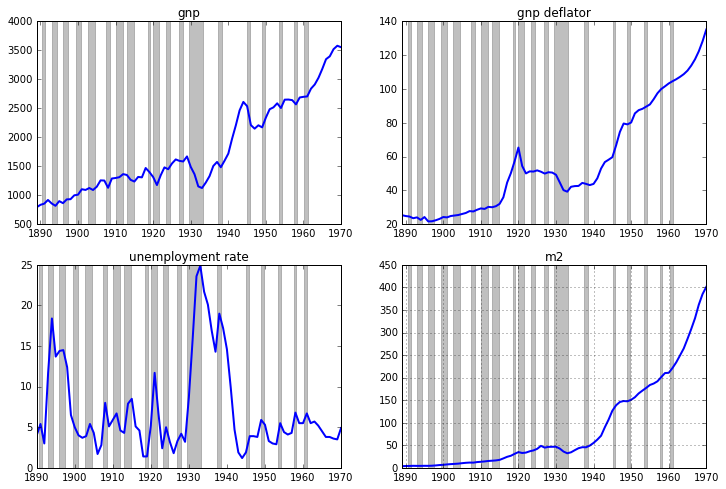

In [6]:
# Plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(2,2,1)
ax.plot(gnp_pc.data,'-',lw=2)
gnp_pc.recessions()
ax.set_title('gnp')
# ax.xaxis.set_major_locator(years10)

ax = fig.add_subplot(2,2,2)
ax.plot(gnp_def.data,'-',lw=2)
gnp_def.recessions()
ax.set_title('gnp deflator')
# ax.xaxis.set_major_locator(years10)

ax = fig.add_subplot(2,2,3)
ax.plot(unemployment.data,'-',lw=2)
unemployment.recessions()
ax.set_title('unemployment rate')
# ax.xaxis.set_major_locator(years10)

ax = fig.add_subplot(2,2,4)
ax.plot(m2.data,'-',lw=2)
m2.recessions()
ax.set_title('m2')
# ax.xaxis.set_major_locator(years10)

# fig.autofmt_xdate()
ax.grid(True)


## Compare with Unemployment Series from FRED

In [7]:
# Download unemployment rate data
unemployment_fred = fp.series('UNRATE')
unemployment_fred = unemployment_fred.as_frequency(freq='A',method='average')

Text(0.5, 1.0, 'unemployment rate')

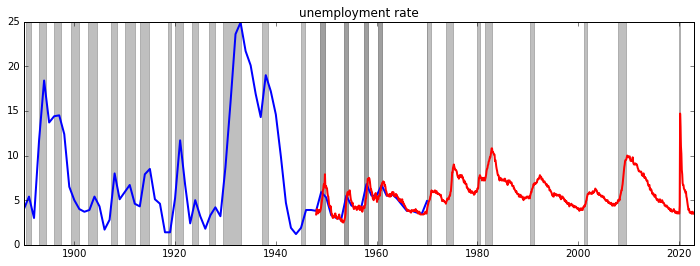

In [8]:
# Plot
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,1,1)
ax.plot(unemployment.data,'b-',lw=2)
ax.plot(unemployment_fred.data,'r-',lw=2)
unemployment.recessions()
unemployment_fred.recessions()
ax.set_title('unemployment rate')
# ax.xaxis.set_major_locator(years10)

## Construct a GNP Deflator Series

In [9]:
# Download GNP deflator data from FRED
gnp_def_fred = fp.series('A001RG3A086NBEA')

# Trim GNP deflator series
gnp_def = gnp_def.window(['1800-01-01','1929-01-01'])

# Scale historic GNP deflator series so base coincides with the FRED series
for i in gnp_def.data.index:
    gnp_def.data.loc[i] = gnp_def.data.loc[i]*gnp_def_fred.data.iloc[0]/gnp_def.data.iloc[-1]
    

gnp_def = pd.concat([gnp_def.data.loc[:'1928'],gnp_def_fred.data],axis=0)
gnp_def = fp.to_fred_series(data = gnp_def,dates = gnp_def.index)

Text(0.5, 1.0, 'real gnp [Index 2012=100]')

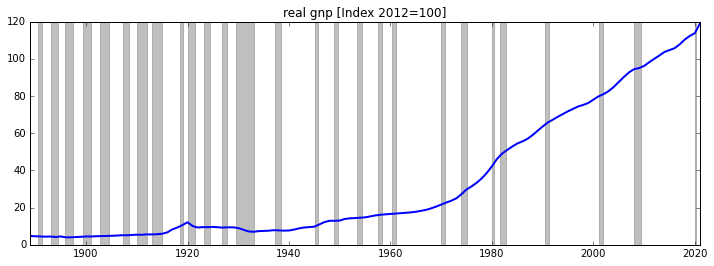

In [10]:
# Plot
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,1,1)
ax.plot(gnp_def.data,'b-',lw=2)
gnp_def.recessions()
ax.set_title('real gnp ['+gnp_def_fred.units+']')
# ax.xaxis.set_major_locator(years10)

## Bank Suspensions in US from 1864 - 1914

In [11]:
# Import data
data = pd.read_csv('../csv/Historical Statistics of the US - bank suspensions.csv',skiprows =4,index_col='Years',parse_dates=True)
bank_suspensions=fp.to_fred_series(data = data.iloc[0:51]['Total number of suspensions'].values,dates = pd.DatetimeIndex(data.iloc[0:51].index),frequency='A')


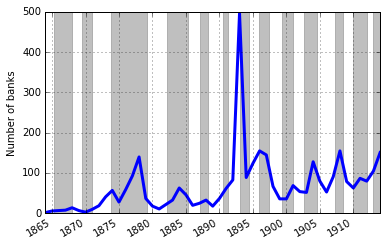

In [12]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(bank_suspensions.data,'-',lw=3)
bank_suspensions.recessions()
# ax.xaxis.set_major_locator(years10)
ax.set_ylabel('Number of banks')
ax.grid(True)
fig.autofmt_xdate()